In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [3]:
#import data
cust= pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 1 - Retail Case Study/customer.csv")
product = pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 1 - Retail Case Study/prod_cat_info.csv")
transaction= pd.read_csv("C:/Users/lenovo/Desktop/py/Case Study 1 - Retail Case Study/transactions.csv")


In [4]:
customer_final = pd.merge(cust, transaction, left_on='customer_Id', right_on='cust_id', how='inner')
customer_final = pd.merge(customer_final, product, left_on=['prod_subcat_code', 'prod_cat_code'], right_on = ['prod_cat_code','prod_sub_cat_code'],how='inner')
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Clothing,4,Mens
1,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,1,Clothing,4,Mens
2,268159,08-01-1970,F,8.0,86038271893,268159,30-01-2013,1,4,1,705,74.025,779.025,e-Shop,1,Clothing,4,Mens
3,270829,22-01-1970,F,8.0,22079731721,270829,10/8/2012,1,4,1,1182,124.110,1306.110,TeleShop,1,Clothing,4,Mens
4,274630,01-02-1970,M,4.0,16857641351,274630,5/12/2013,1,4,2,269,56.490,594.490,MBR,1,Clothing,4,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,272141,02-12-1992,F,10.0,79059585885,272141,25-10-2012,5,3,2,1354,284.340,2992.340,e-Shop,5,Books,3,Comics
5955,269719,04-12-1992,F,8.0,70553332101,269719,23-11-2013,5,3,2,623,130.830,1376.830,Flagship store,5,Books,3,Comics
5956,275051,04-12-1992,M,5.0,77933614379,275051,18-05-2013,5,3,5,1095,574.875,6049.875,e-Shop,5,Books,3,Comics
5957,270695,05-12-1992,F,6.0,2300510157,270695,20-11-2012,5,3,3,906,285.390,3003.390,TeleShop,5,Books,3,Comics


In [11]:
## a. Get the column names and their corresponding data types

print("Columns names         data types  ")
print(customer_final.dtypes)


Columns names         data types  
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code_x        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat_code_y        int64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


In [13]:
## b. Top/Bottom 10 observations

print('Top 10 Observations : ')
print(customer_final.head(10))
print()

print('Bottom 10 Observations : ')
print(customer_final.tail(10))
print()


Top 10 Observations : 
   customer_Id         DOB Gender  city_code  transaction_id  cust_id  \
0       268408  02-01-1970      M        4.0     16197868036   268408   
1       268408  02-01-1970      M        4.0     16197868036   268408   
2       268159  08-01-1970      F        8.0     86038271893   268159   
3       270829  22-01-1970      F        8.0     22079731721   270829   
4       274630  01-02-1970      M        4.0     16857641351   274630   
5       270324  01-02-1970      F        1.0     72381832004   270324   
6       267609  18-02-1970      M        2.0     14818019898   267609   
7       267609  18-02-1970      M        2.0     14818019898   267609   
8       274592  08-03-1970      M        5.0     34070850488   274592   
9       274834  02-04-1970      M        4.0     66101492551   274834   

    tran_date  prod_subcat_code  prod_cat_code_x  Qty  Rate      Tax  \
0  16-12-2013                 1                4   -5  -210  110.250   
1  12/12/2013                

In [14]:
## c. five number summary
print('Five-Number Summary')
print(customer_final.describe().T)

Five-Number Summary
                    count          mean           std           min  \
customer_Id        5959.0  2.709987e+05  2.416759e+03  2.667830e+05   
city_code          5956.0  5.503526e+00  2.855752e+00  1.000000e+00   
transaction_id     5959.0  5.057360e+10  2.905637e+10  1.086136e+07   
cust_id            5959.0  2.709987e+05  2.416759e+03  2.667830e+05   
prod_subcat_code   5959.0  2.976842e+00  1.523168e+00  1.000000e+00   
prod_cat_code_x    5959.0  3.019466e+00  1.533324e+00  1.000000e+00   
Qty                5959.0  2.402752e+00  2.314606e+00 -5.000000e+00   
Rate               5959.0  6.304429e+02  6.329985e+02 -1.497000e+03   
Tax                5959.0  2.511361e+02  1.892741e+02  7.350000e+00   
total_amt          5959.0  2.090259e+03  2.565897e+03 -8.270925e+03   
prod_cat_code_y    5959.0  2.976842e+00  1.523168e+00  1.000000e+00   
prod_sub_cat_code  5959.0  3.019466e+00  1.533324e+00  1.000000e+00   

                            25%           50%           

In [16]:
##  d. Frequency tables for all the categorical variables
categorical_cols = customer_final.select_dtypes(include=['object']).columns

for column in categorical_cols:
    print(f"\nFrequency table for {column}:\n")
    print(customer_final[column].value_counts())
    


Frequency table for DOB:

09-08-1976    10
11-11-1987    10
26-05-1977    10
26-02-1991     9
09-06-1970     9
              ..
06-11-1977     1
06-10-1977     1
12-09-1977     1
19-07-1977     1
02-12-1992     1
Name: DOB, Length: 2853, dtype: int64

Frequency table for Gender:

M    3096
F    2861
Name: Gender, dtype: int64

Frequency table for tran_date:

4/1/2013      15
22-11-2011    14
5/2/2013      13
14-01-2014    12
15-06-2013    12
              ..
26-08-2011     1
27-04-2011     1
25-07-2013     1
14-02-2011     1
24-12-2012     1
Name: tran_date, Length: 1121, dtype: int64

Frequency table for Store_type:

e-Shop            2380
MBR               1231
Flagship store    1178
TeleShop          1170
Name: Store_type, dtype: int64

Frequency table for prod_cat:

Clothing       2008
Bags           1962
Electronics    1031
Books           958
Name: prod_cat, dtype: int64

Frequency table for prod_subcat:

Women        2000
Mens         1970
Computers    1031
Comics        958
Na

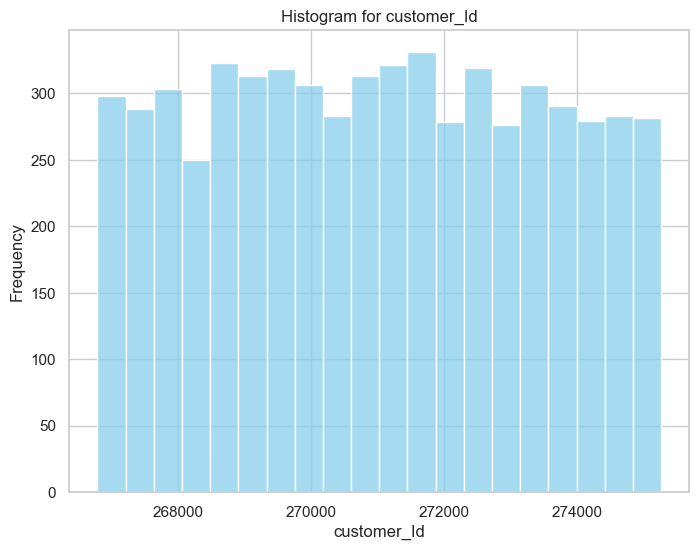

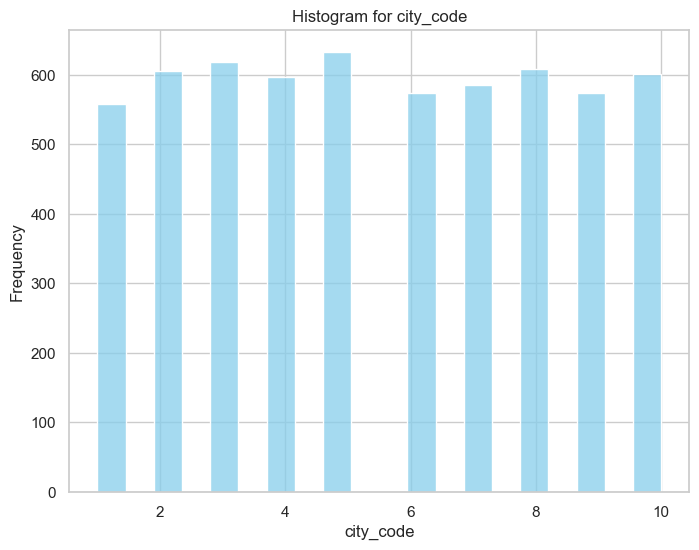

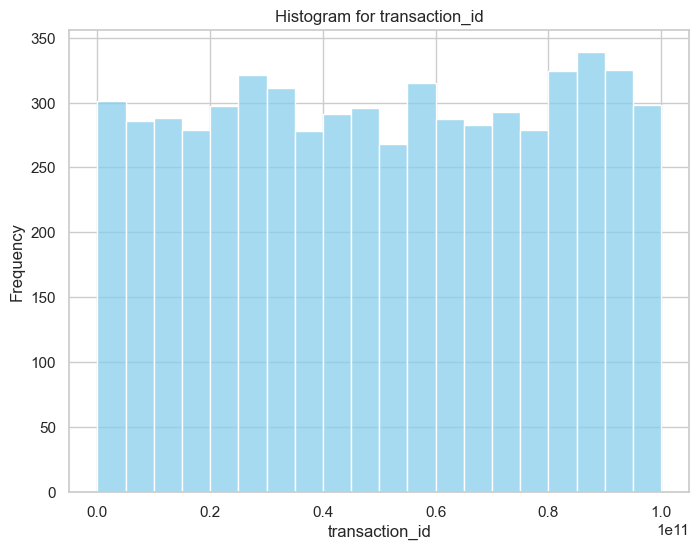

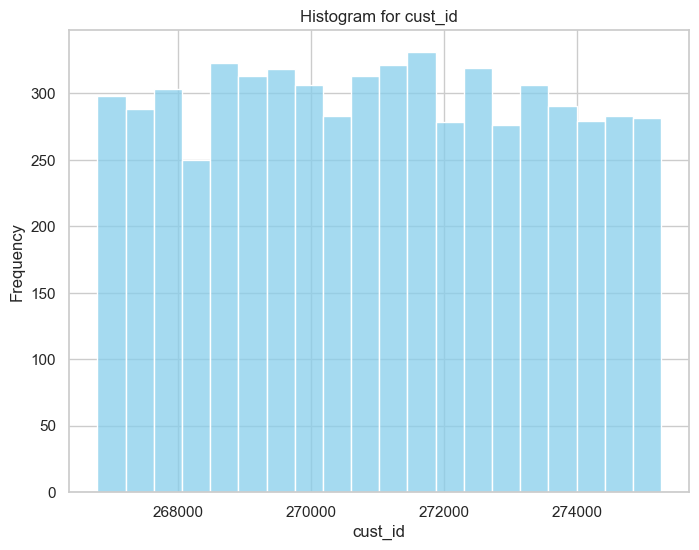

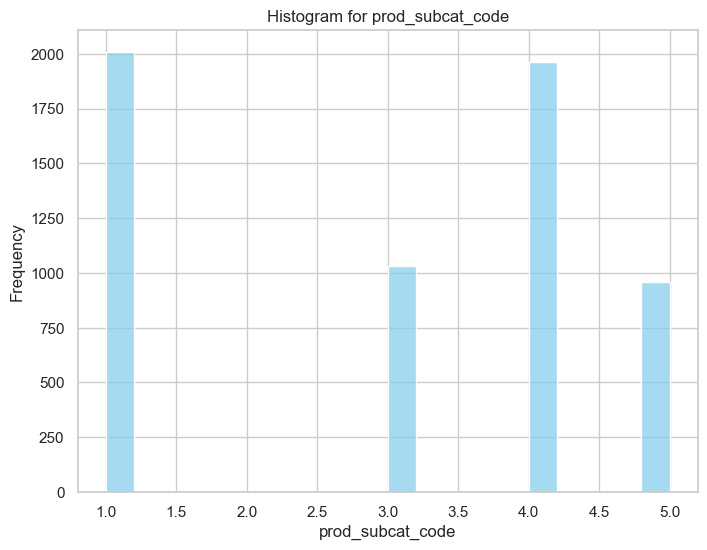

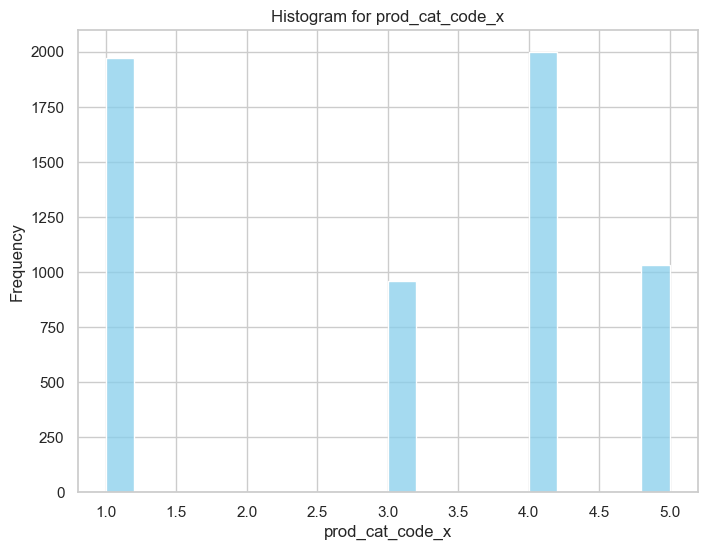

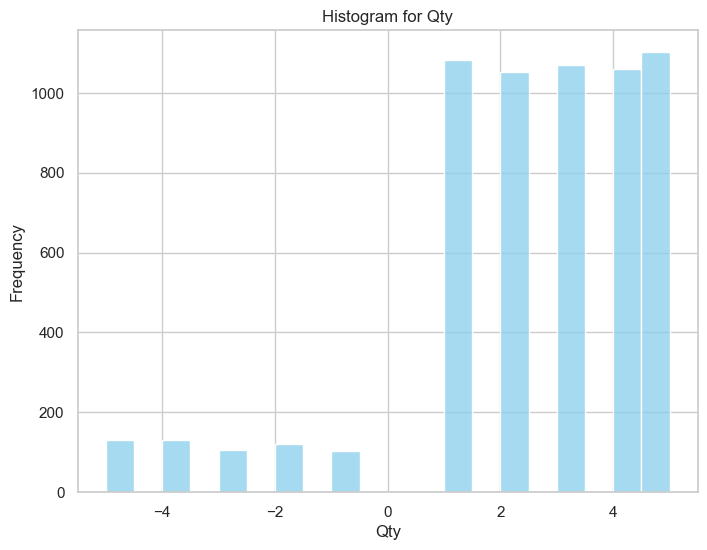

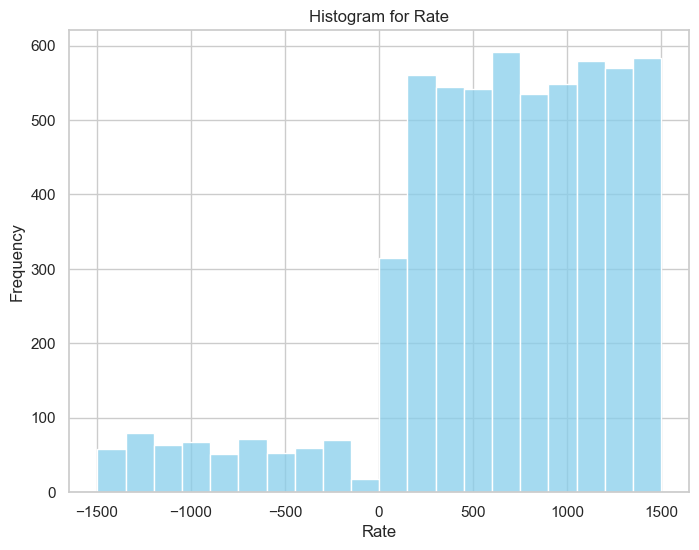

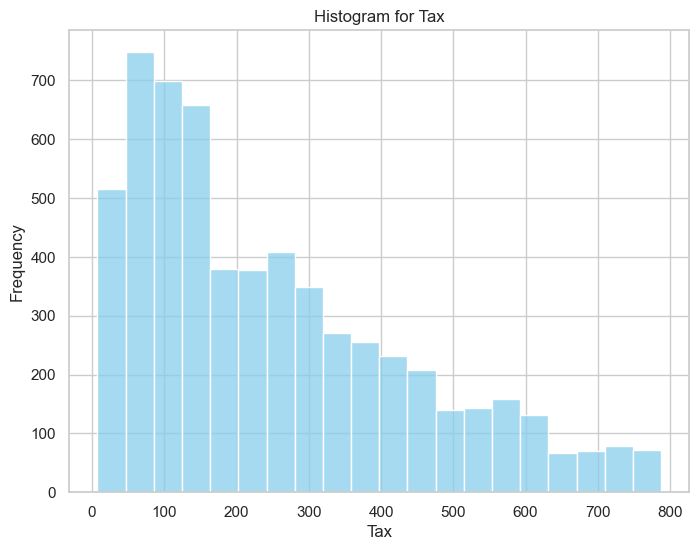

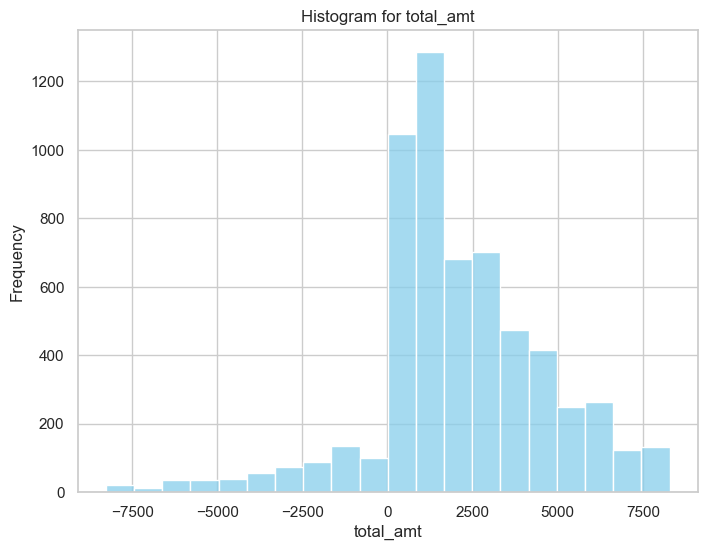

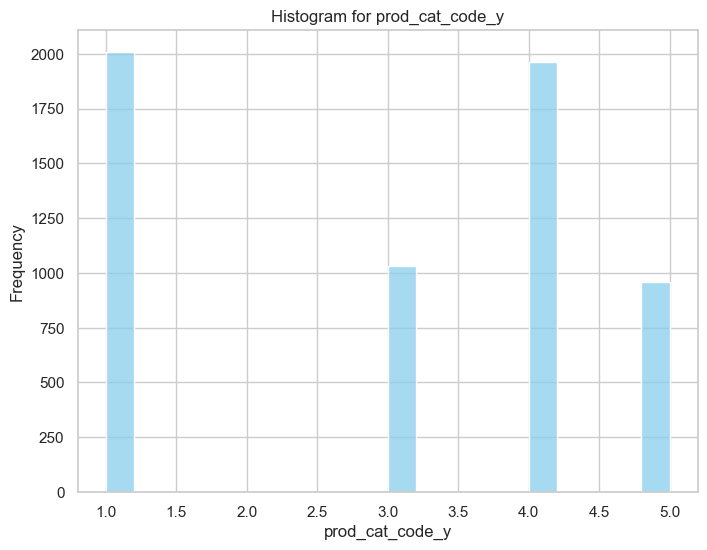

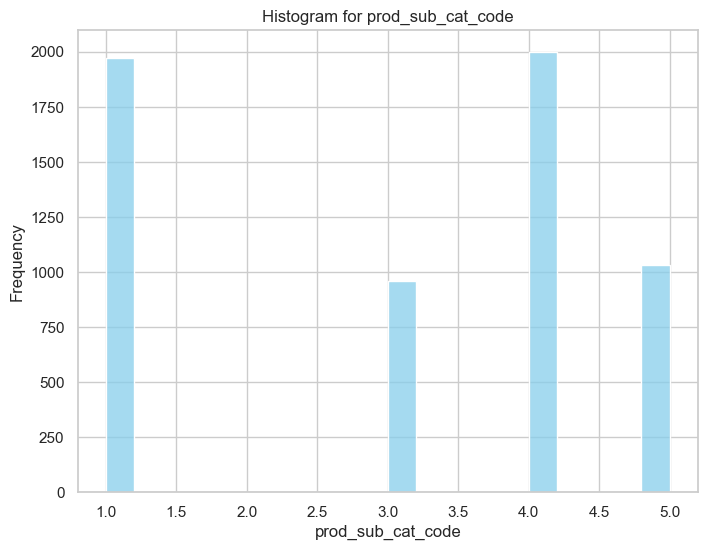

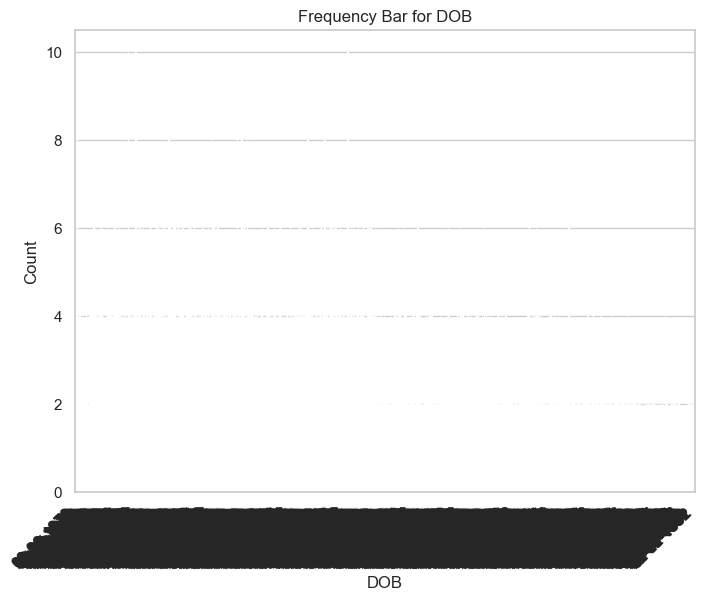

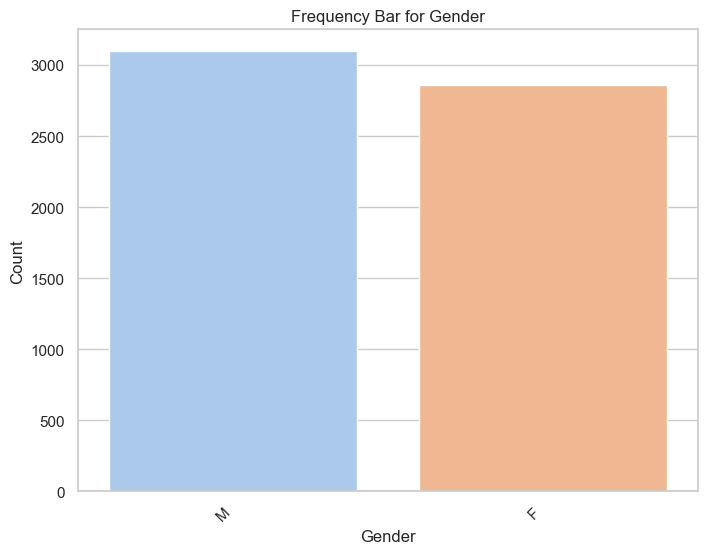

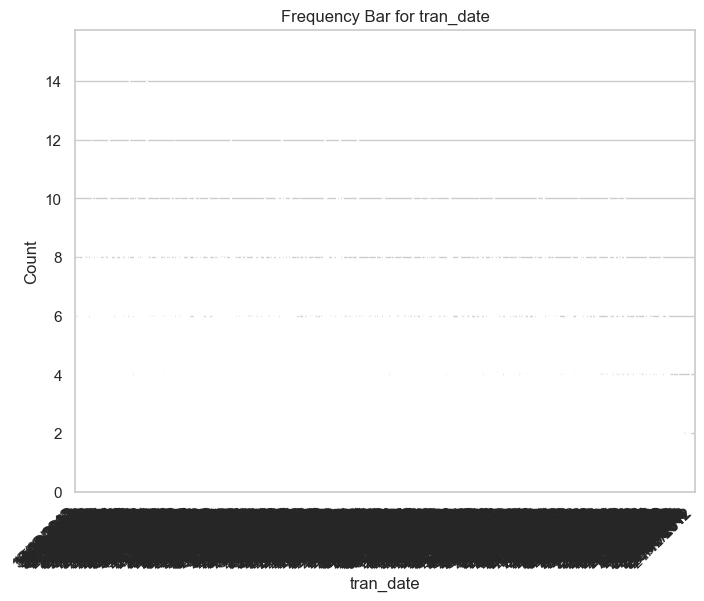

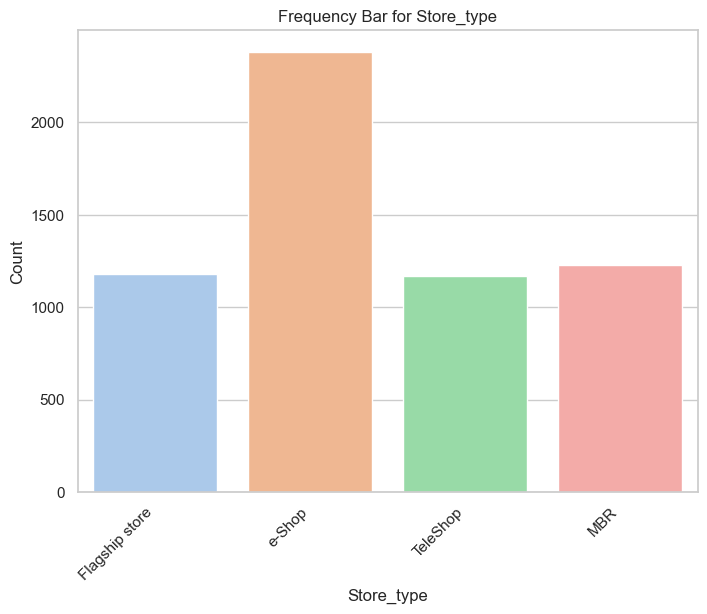

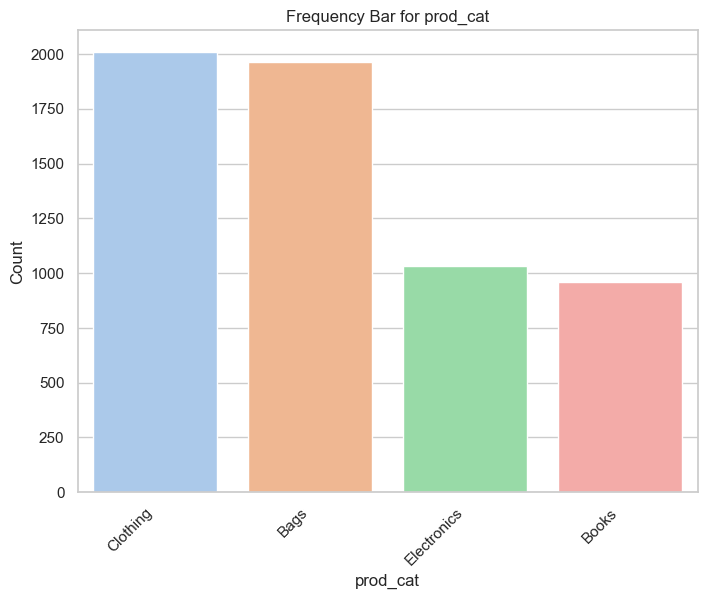

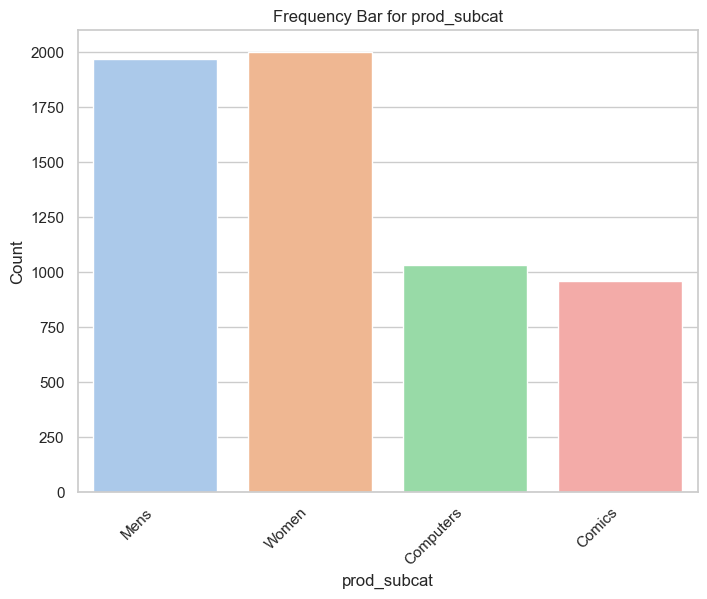

In [4]:
sns.set(style="whitegrid")

continuous_columns = customer_final.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = customer_final.select_dtypes(include=['object']).columns

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(customer_final[column], bins=20, color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=customer_final[column], palette='pastel')
    plt.title(f'Frequency Bar for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') 
    plt.show()

In [15]:
## a. 
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])
start_date = customer_final['tran_date'].min()
end_date = customer_final['tran_date'].max()
print(f"a. time available data:")
print(f"   Start Date: {start_date}")
print(f"   End Date: {end_date}")

## b. 
negative_transactions_count = customer_final[customer_final['total_amt'] < 0].shape[0]
print(f"b. negative transaction count: {negative_transactions_count}")


a. time available data:
   Start Date: 2011-01-02 00:00:00
   End Date: 2014-12-02 00:00:00
b. negative transaction count: 591


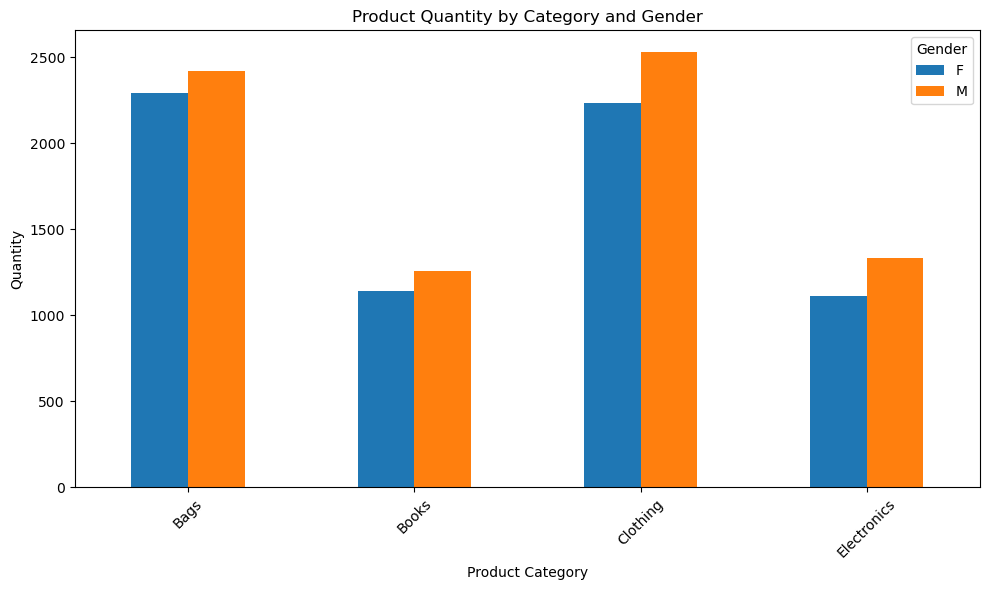

In [17]:
male=pd.pivot_table(data=customer_final,values='Qty',index='prod_cat',columns='Gender',aggfunc='sum')

male.plot(kind='bar', figsize=(10, 6))

plt.title('Product Quantity by Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45) 
plt.legend(title='Gender')
plt.tight_layout() 

plt.show()

In [34]:
top_city=customer_final.groupby('city_code').agg({'customer_Id':'count'})
top_city=top_city.sort_values('customer_Id',ascending=False)
top_city.head(1)

,customer_Id
city_code,
5.0,633


In [36]:
percentage=top_city.max()/len(customer_final)*100
percentage

customer_Id    10.622588
dtype: float64

In [25]:
store_type_stats = customer_final.groupby('Store_type').agg({'Qty': 'sum', 'total_amt': 'sum'})
max_qty_store_type = store_type_stats['Qty'].idxmax()
max_value_store_type = store_type_stats['total_amt'].idxmax()
print(f"max quantity: {max_qty_store_type}")
print(f"max value: {max_value_store_type}")


max quantity: e-Shop
max value: e-Shop


In [37]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Clothing,4,Mens
1,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,1,Clothing,4,Mens
2,268159,08-01-1970,F,8.0,86038271893,268159,30-01-2013,1,4,1,705,74.025,779.025,e-Shop,1,Clothing,4,Mens
3,270829,22-01-1970,F,8.0,22079731721,270829,10/8/2012,1,4,1,1182,124.110,1306.110,TeleShop,1,Clothing,4,Mens
4,274630,01-02-1970,M,4.0,16857641351,274630,5/12/2013,1,4,2,269,56.490,594.490,MBR,1,Clothing,4,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,272141,02-12-1992,F,10.0,79059585885,272141,25-10-2012,5,3,2,1354,284.340,2992.340,e-Shop,5,Books,3,Comics
5955,269719,04-12-1992,F,8.0,70553332101,269719,23-11-2013,5,3,2,623,130.830,1376.830,Flagship store,5,Books,3,Comics
5956,275051,04-12-1992,M,5.0,77933614379,275051,18-05-2013,5,3,5,1095,574.875,6049.875,e-Shop,5,Books,3,Comics
5957,270695,05-12-1992,F,6.0,2300510157,270695,20-11-2012,5,3,3,906,285.390,3003.390,TeleShop,5,Books,3,Comics


In [49]:
flagship_categories = ['Electronics', 'Clothing']
filtered_data = customer_final[(customer_final['Store_type'] == 'Flagship store') 
                               & (customer_final['prod_cat'].isin(flagship_categories))]
total_amount_earned = filtered_data['total_amt'].sum()
print(f"The total amount: {total_amount_earned:.2f}")

The total amount: 1176402.89


In [28]:
filtered_data = customer_final[(customer_final['Gender'] == 'M') & (customer_final['prod_cat'] == 'Electronics')]

total_amount_earned = filtered_data['total_amt'].sum()
print(f"amount by male under electronics : {total_amount_earned:.2f}")

amount by male under electronic : 1155323.91


In [30]:
filtered_data = customer_final[customer_final['total_amt'] >= 0]
customers_more_than_10_transactions = filtered_data.groupby('customer_Id').filter(lambda x: x['transaction_id'].nunique() > 10)
num_customers_more_than_10_transactions = customers_more_than_10_transactions['customer_Id'].nunique()

print(f"no. of customers (after removing transactions with negative amounts) is: {num_customers_more_than_10_transactions}")


no. of customers (after removing transactions with negative amounts) is: 0


In [32]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])
current_date = pd.Timestamp.now()
customer_final['Age'] = (current_date - customer_final['DOB']).astype('<m8[Y]')
filtered_customers = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]


# a. What was the total amount spent for "Electronics" and "Books" product categories?
electronics_books_total_amount = filtered_customers.loc[filtered_customers['prod_cat'].isin(['Electronics', 'Books']), 'total_amt'].sum()

print(f"a. total amount electronics and books: {electronics_books_total_amount:.2f}")

# b. What was the total amount spent by these customers between 1st Jan, 2014, to 1st Mar, 2014?
filtered_customers_jan_mar = filtered_customers[(filtered_customers['tran_date'] >= '2014-01-01') & (filtered_customers['tran_date'] <= '2014-03-01')]
total_amount_jan_mar = filtered_customers_jan_mar['total_amt'].sum()

print(f"b. The total amount by customer : {total_amount_jan_mar:.2f}")


a. total amount electronics and books: 842702.83
b. The total amount by customer : 103416.95


In [1]:
import pandas as pd


In [8]:
pd.options.display.max_rows=60


In [12]:
pd.options.display.max_rows

60

In [9]:
cust

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [11]:
print(cust.to_string())

      customer_Id         DOB Gender  city_code
0          268408  02-01-1970      M        4.0
1          269696  07-01-1970      F        8.0
2          268159  08-01-1970      F        8.0
3          270181  10-01-1970      F        2.0
4          268073  11-01-1970      M        1.0
5          273216  15-01-1970      F        5.0
6          266929  15-01-1970      M        8.0
7          275152  16-01-1970      M        4.0
8          275034  18-01-1970      F        4.0
9          273966  21-01-1970      M        8.0
10         270829  22-01-1970      F        8.0
11         266997  23-01-1970      M        9.0
12         272455  25-01-1970      M        7.0
13         274593  26-01-1970      M       10.0
14         273391  29-01-1970      F        2.0
15         267657  29-01-1970      F        7.0
16         271344  29-01-1970      F        5.0
17         268275  01-02-1970      F        7.0
18         274630  01-02-1970      M        4.0
19         273541  01-02-1970      M    

In [ ]:
to_datetime